In [7]:
import sqlite3 as sql_client
import pandas as data_analyzer
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [8]:
SQL_DB_FILE_PATH='../FPA_FOD_20170508.sqlite'
connection = sql_client.connect(SQL_DB_FILE_PATH)

In [9]:
causes_map = {
  'Miscellaneous': 0,
  'Lightning': 1,
  'Debris Burning': 2,
  'Campfire': 3,
  'Equipment Use': 4,
  'Arson': 5,
  'Children': 6,
  'Railroad': 7,
  'Smoking': 8,
  'Powerline': 9,
  'Structure': 10,
  'Fireworks': 11,
  'Missing/Undefined': 12
}

In [48]:
al = ['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY']
east_us = ['AL', 'TN', 'KY', 'ME','NH','NY','MA','RI','CT','NJ','DE', 'MD', 'VA', 'WV', 'VI','PA','NC','SC', 'KY', 'GA','FL']
west_us = ['CA','OR','WA', 'AK', 'NV', 'AZ', 'ID', 'MT' ]
others = []
for state in al:
    if state not in east_us:
        if state not in west_us:
            others.append(state)




north = ['AK', 'WA', 'MT','ND', 'SD', 'WY', 'OR','IL','IN', 'IA', 'ME', 'MA', 'MI','MN' 'NH','NJ','NY','OH','PA','RI','VT','WI']
south = []
for state in al:
    if state not in north:
        south.append(state)
def getEastResult(q):
    in_query = "('" + "','".join(east_us) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getWestResult(q):
    in_query = "('" + "','".join(west_us) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getOtherResult(q):
    in_query = "('" + "','".join(others) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getNorthResult(q):
    in_query = "('" + "','".join(north) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getSouthResult(q):
    in_query = "('" + "','".join(south) + "')"
    return data_analyzer.read_sql(q.format(in_query), con=connection)

def getAllResult(q):
    res = {}
    res['east'] = getEastResult(q)
    res['west'] = getWestResult(q)
    res['other'] = getOtherResult(q)
    res['north'] = getNorthResult(q)
    res['south'] = getSouthResult(q)
    return res


In [49]:
res = getAllResult("""
    SELECT STATE, SUM(FIRE_SIZE) TOTAL
    FROM FIRES 
    WHERE STATE IN {}
    GROUP BY STATE
    ORDER BY TOTAL DESC
""")

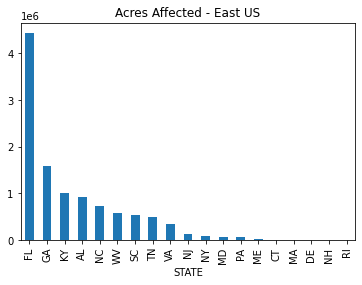

In [50]:
res['east'].set_index('STATE')['TOTAL'].plot(title = 'Acres Affected - East US', kind="bar")

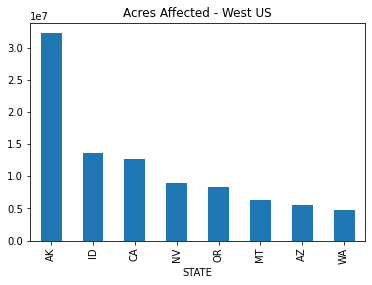

In [51]:
res['west'].set_index('STATE')['TOTAL'].plot(title = 'Acres Affected - West US', kind="bar")

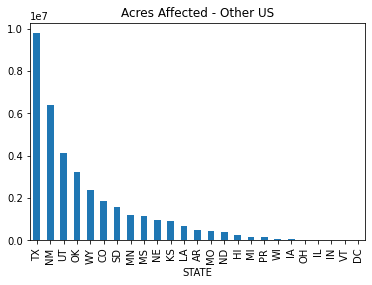

In [52]:
res['other'].set_index('STATE')['TOTAL'].plot(title = 'Acres Affected - Other US', kind="bar")

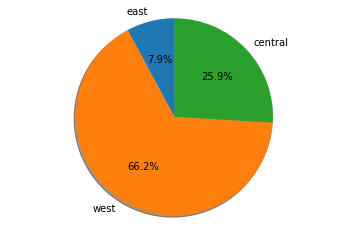

In [53]:
res['east']
labels = ['east', 'west', 'central']
regions = []
regions.append(sum(res['east']['TOTAL']))
regions.append(sum(res['west']['TOTAL']))
regions.append(sum(res['other']['TOTAL']))
fig1, ax1 = plt.subplots()
ax1.pie(regions,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


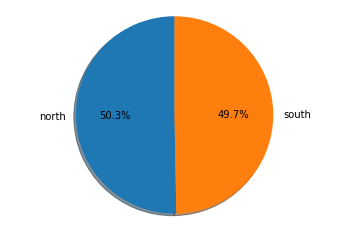

In [46]:
res['east']
labels = ['north', 'south']
regions = []
regions.append(sum(res['north']['TOTAL']))
regions.append(sum(res['south']['TOTAL']))
fig1, ax1 = plt.subplots()
ax1.pie(regions,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [16]:
res = getAllResult("""
    SELECT FIRE_YEAR, COUNT(*) INCIDENT_COUNT
    FROM FIRES 
    WHERE STATE IN {}
    GROUP BY FIRE_YEAR
""")

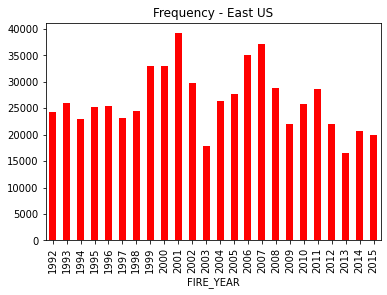

In [17]:
res['east'].set_index('FIRE_YEAR')['INCIDENT_COUNT'].plot(title = 'Frequency - East US', kind="bar", color='red')

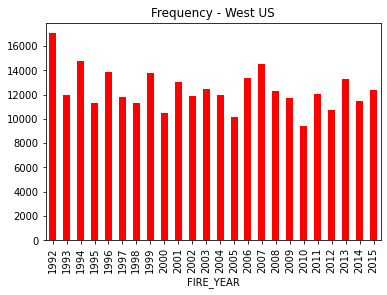

In [18]:
res['west'].set_index('FIRE_YEAR')['INCIDENT_COUNT'].plot(title = 'Frequency - West US', kind="bar", color='red')

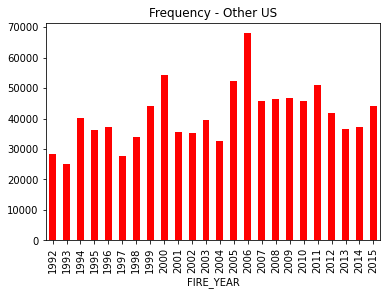

In [19]:
res['other'].set_index('FIRE_YEAR')['INCIDENT_COUNT'].plot( title = 'Frequency - Other US', kind="bar", color='red')

In [21]:
res = getAllResult("""
    SELECT STAT_CAUSE_DESCR CAUSE, COUNT(*) INCIDENT_COUNT
    FROM FIRES 
    WHERE STATE IN {}
    GROUP BY CAUSE
""")

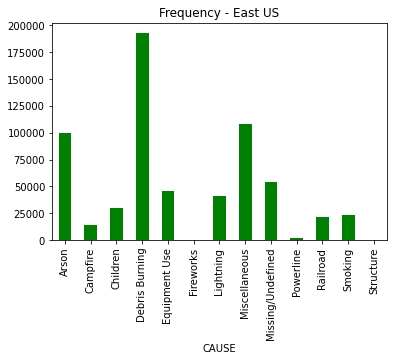

In [22]:
res['east'].set_index('CAUSE')['INCIDENT_COUNT'].plot(title = 'Frequency - East US', kind="bar", color='green')

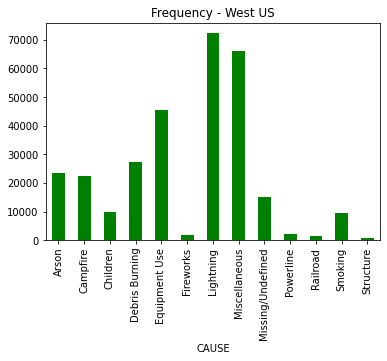

In [23]:
res['west'].set_index('CAUSE')['INCIDENT_COUNT'].plot(title = 'Frequency - West US', kind="bar", color='green')

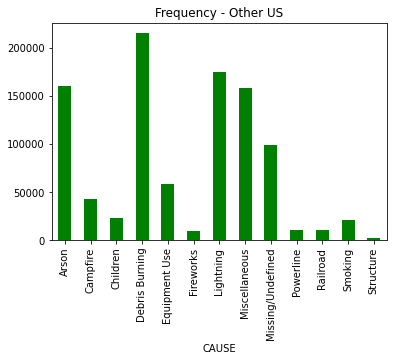

In [24]:
res['other'].set_index('CAUSE')['INCIDENT_COUNT'].plot(title = 'Frequency - Other US', kind="bar", color='green')